In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from pathlib import Path
from tensorflow.keras import models, Input

In [9]:
batch_size = 32
img_height = 224
img_width = 224
data_dir = Path('../input/african-wildlife')

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1504 files belonging to 4 classes.
Using 1053 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1504 files belonging to 4 classes.
Using 451 files for validation.


In [12]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

In [13]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 12
Number of test batches: 3


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications import EfficientNetB0

In [16]:
data_aug = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomFlip('vertical'),  
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1), 
    layers.RandomBrightness(0.1),
  ]
)

# MOBILENETV2

In [120]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [121]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [122]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [129]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_aug(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [130]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_4 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_4 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_14     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [131]:
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])



In [132]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.2704 - loss: 1.7925 - val_accuracy: 0.4085 - val_loss: 1.3400
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3785 - loss: 1.3880 - val_accuracy: 0.5493 - val_loss: 1.1260
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4875 - loss: 1.1735 - val_accuracy: 0.6732 - val_loss: 0.9491
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5566 - loss: 1.0482 - val_accuracy: 0.7352 - val_loss: 0.8333
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6459 - loss: 0.9312 - val_accuracy: 0.7690 - val_loss: 0.7261
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6539 - loss: 0.8309 - val_accuracy: 0.8197 - val_loss: 0.6264
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6942 - loss: 0.7885 - val_accuracy: 0.8592 - val_loss: 0.5690
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7045 - loss: 0.7387 - val_accuracy: 0.8873 - val_loss:

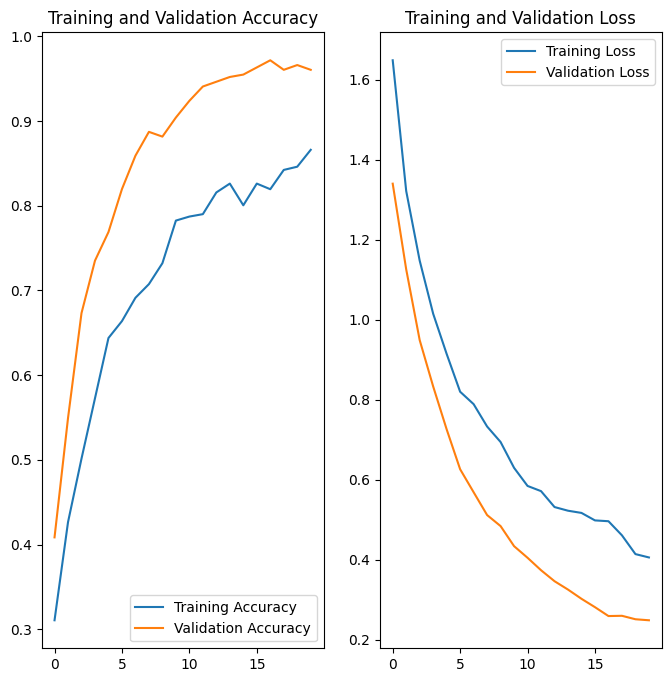

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [135]:
# Extract the final training and validation accuracy from the history
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Print the final accuracies
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


Final Training Accuracy: 0.8661
Final Validation Accuracy: 0.9606


In [136]:

loss, accuracy = model.evaluate(test_dataset)


print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.9427 - loss: 0.2792
Test Loss: 0.26155152916908264
Test Accuracy: 0.9479166865348816


# RESNET50

In [28]:
base_model2 = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model2.trainable = False

In [ ]:
base_model2.summary()

Model: "resnet50"

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [31]:
inputs2 = tf.keras.Input(shape=(224, 224, 3))
x2 = data_aug(inputs2)
x2 = tf.keras.applications.resnet50.preprocess_input(x2)
x2 = base_model2(x2, training=False)
x2 = tf.keras.layers.GlobalAveragePooling2D()(x2)
x2 = tf.keras.layers.Dropout(0.2)(x2)
outputs2 = layers.Dense(4, activation='softmax')(x2)
model2 = tf.keras.Model(inputs2, outputs2)

In [32]:
base_learning_rate = 0.0001

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])


In [33]:
epochs = 20
history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.2312 - loss: 1.9080 - val_accuracy: 0.3634 - val_loss: 1.3600
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.3933 - loss: 1.4427 - val_accuracy: 0.5944 - val_loss: 1.0057
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.5269 - loss: 1.1098 - val_accuracy: 0.6732 - val_loss: 0.8195
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6507 - loss: 0.8984 - val_accuracy: 0.7239 - val_loss: 0.6805
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.6838 - loss: 0.8173 - val_accuracy: 0.7718 - val_loss: 0.5742
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.7323 - loss: 0.6881 - val_accuracy: 0.8310 - val_loss: 0.4788
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.7654 - loss: 0.6182 - val_accuracy: 0.8620 - val_loss: 0.4221
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.7522 - loss: 0.6086 - val_accuracy: 0.8817 - v

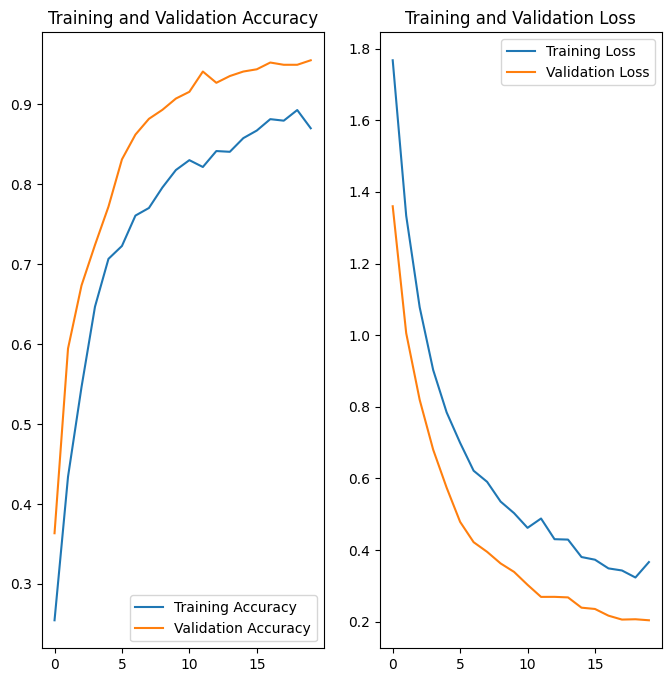

In [34]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:

final_train_accuracy2 = history2.history['accuracy'][-1]
final_val_accuracy2 = history2.history['val_accuracy'][-1]


print(f"Final Training Accuracy: {final_train_accuracy2:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy2:.4f}")

Final Training Accuracy: 0.8699
Final Validation Accuracy: 0.9549


In [36]:

loss2, accuracy2 = model2.evaluate(test_dataset)


print(f"Test Loss: {loss2}")
print(f"Test Accuracy: {accuracy2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9583 - loss: 0.1863
Test Loss: 0.22744160890579224
Test Accuracy: 0.9479166865348816


# INCEPTIONV3

In [37]:
base_model3 = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model3.trainable = False

In [ ]:
base_model3.summary()

Model: "inception_v3"

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [42]:
inputs3 = tf.keras.Input(shape=(224, 224, 3))
x3 = data_aug(inputs3)
x3 = tf.keras.applications.inception_v3.preprocess_input(x3)
x3 = base_model3(x3, training=False)
x3 = tf.keras.layers.GlobalAveragePooling2D()(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
outputs3 = layers.Dense(4, activation='softmax')(x3)
model3 = tf.keras.Model(inputs3, outputs3)

In [43]:
base_learning_rate = 0.0001

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [44]:
epochs = 20
history3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.3211 - loss: 1.5626 - val_accuracy: 0.7577 - val_loss: 0.8427
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5383 - loss: 1.1150 - val_accuracy: 0.8394 - val_loss: 0.5508
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6612 - loss: 0.9004 - val_accuracy: 0.9042 - val_loss: 0.3998
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6971 - loss: 0.7895 - val_accuracy: 0.9014 - val_loss: 0.3265
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7411 - loss: 0.6792 - val_accuracy: 0.9296 - val_loss: 0.2888
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7583 - loss: 0.6046 - val_accuracy: 0.9408 - val_loss: 0.2497
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7559 - loss: 0.6035 - val_accuracy: 0.9408 - val_loss: 0.2292
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7840 - loss: 0.5615 - val_accuracy: 0.9324 - val_loss:

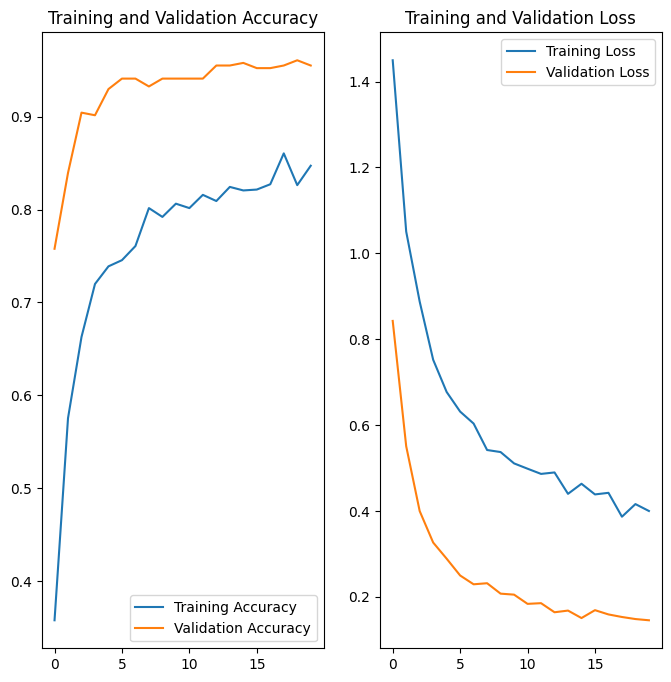

In [45]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:

final_train_accuracy3 = history3.history['accuracy'][-1]
final_val_accuracy3 = history3.history['val_accuracy'][-1]


print(f"Final Training Accuracy: {final_train_accuracy3:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy3:.4f}")

Final Training Accuracy: 0.8471
Final Validation Accuracy: 0.9549


In [47]:

loss3, accuracy3 = model3.evaluate(test_dataset)


print(f"Test Loss: {loss3}")
print(f"Test Accuracy: {accuracy3}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9284 - loss: 0.2149
Test Loss: 0.21808649599552155
Test Accuracy: 0.9270833134651184


# EFFICIENTNETB0

In [48]:
base_model4 = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model4.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model4.summary()

Model: "efficientnetb0"

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [52]:
inputs4 = tf.keras.Input(shape=(224, 224, 3))
x4 = data_aug(inputs4)
x4 = tf.keras.applications.efficientnet.preprocess_input(x4)
x4 = base_model4(x4, training=False)
x4 = tf.keras.layers.GlobalAveragePooling2D()(x4)
x4 = tf.keras.layers.Dropout(0.2)(x4)
outputs4 = layers.Dense(4, activation='softmax')(x4)
model4 = tf.keras.Model(inputs4, outputs4)

In [53]:
base_learning_rate = 0.0001

model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [54]:
epochs = 20
history4 = model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.3065 - loss: 1.4082 - val_accuracy: 0.5239 - val_loss: 1.2388
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.4685 - loss: 1.2094 - val_accuracy: 0.6338 - val_loss: 1.0778
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5577 - loss: 1.1031 - val_accuracy: 0.7296 - val_loss: 0.9340
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6525 - loss: 0.9755 - val_accuracy: 0.7915 - val_loss: 0.8377
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6735 - loss: 0.9096 - val_accuracy: 0.8507 - val_loss: 0.7625
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7490 - loss: 0.8169 - val_accuracy: 0.8845 - val_loss: 0.7029
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7432 - loss: 0.7811 - val_accuracy: 0.9042 - val_loss: 0.6288
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7808 - loss: 0.7301 - val_accuracy: 0.9183 - val_loss:

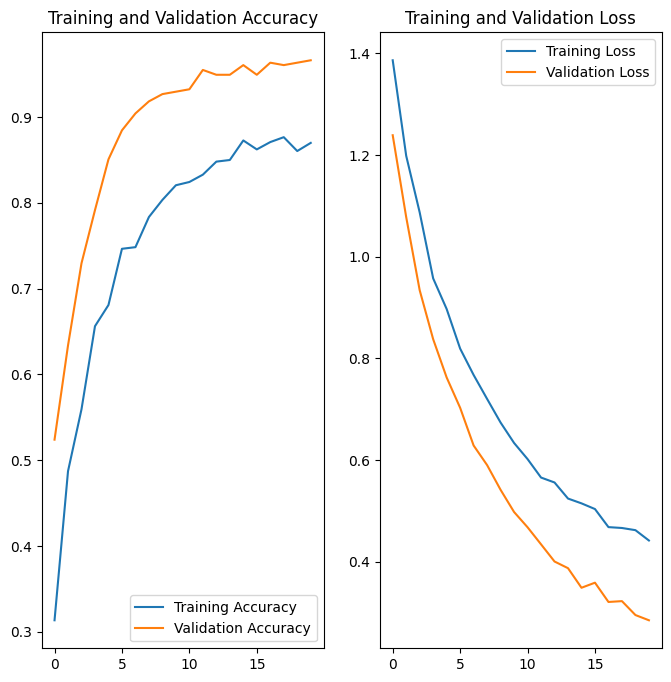

In [56]:
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']

loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc4, label='Training Accuracy')
plt.plot(epochs_range, val_acc4, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss4, label='Training Loss')
plt.plot(epochs_range, val_loss4, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:

final_train_accuracy4 = history4.history['accuracy'][-1]
final_val_accuracy4 = history4.history['val_accuracy'][-1]


print(f"Final Training Accuracy: {final_train_accuracy4:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy4:.4f}")

Final Training Accuracy: 0.8699
Final Validation Accuracy: 0.9662


In [58]:

loss4, accuracy4 = model4.evaluate(test_dataset)


print(f"Test Loss: {loss4}")
print(f"Test Accuracy: {accuracy4}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9193 - loss: 0.3716
Test Loss: 0.3638230562210083
Test Accuracy: 0.9166666865348816
